In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup as soup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import json
import random
import pprint
import re

In [70]:
filepath = '/Users/ivylai/Desktop/Galvanize/apt_scrapper/master_file0329.xlsx'

data = pd.read_excel(filepath)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21001 entries, 0 to 21000
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            21001 non-null  int64  
 1   Unnamed: 0.1          20932 non-null  float64
 2   Unnamed: 0.1.1        17980 non-null  float64
 3   Unnamed: 0.1.1.1      17426 non-null  float64
 4   url                   21001 non-null  object 
 5   property_name         21001 non-null  object 
 6   city                  21001 non-null  object 
 7   rent                  21001 non-null  object 
 8   bed                   21001 non-null  object 
 9   bath                  21001 non-null  object 
 10  sq_ft                 21001 non-null  object 
 11  walkscore             21001 non-null  object 
 12  Unique Features       18070 non-null  object 
 13  Pet Policy            19866 non-null  object 
 14  Parking               18452 non-null  object 
 15  Property Informatio

In [72]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'url', 'property_name', 'city', 'rent', 'bed', 'bath', 'sq_ft',
       'walkscore', 'Unique Features', 'Pet Policy', 'Parking',
       'Property Information', 'Lease Length', 'Services', 'Interior',
       'Fitness & Recreation', 'Features', 'Kitchen', 'Living Space',
       'Security', 'Outdoor Space', 'Student Features', 'Cities',
       'Neighborhoods', 'ZIP Codes', 'Beds', 'Property Style', 'Amenity',
       'Specialty', 'Price'],
      dtype='object')

In [75]:
data_1 = data.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Student Features',
       'Cities', 'Neighborhoods', 'ZIP Codes', 'Beds', 'Property Style',
       'Amenity', 'Specialty', 'Price'])

In [76]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21001 entries, 0 to 21000
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   21001 non-null  object
 1   property_name         21001 non-null  object
 2   city                  21001 non-null  object
 3   rent                  21001 non-null  object
 4   bed                   21001 non-null  object
 5   bath                  21001 non-null  object
 6   sq_ft                 21001 non-null  object
 7   walkscore             21001 non-null  object
 8   Unique Features       18070 non-null  object
 9   Pet Policy            19866 non-null  object
 10  Parking               18452 non-null  object
 11  Property Information  20004 non-null  object
 12  Lease Length          17594 non-null  object
 13  Services              17958 non-null  object
 14  Interior              17047 non-null  object
 15  Fitness & Recreation  18288 non-null

In [77]:
data_1['city'] = data_1['city'].str.title()
data_1['city'].sort_values().unique()

array(['Alameda', 'Albany', 'Anaheim', 'Antelope', 'Aptos', 'Arcata',
       'Atascadero', 'Auburn', 'Bakersfield', 'Belmont', 'Berkeley',
       'Beverly Hills', 'Bonita', 'Brea', 'Burbank', 'Burlingame',
       'Cameron Park', 'Campbell', 'Canoga Park', 'Capitola', 'Carlsbad',
       'Carmichael', 'Carpinteria', 'Cayucos', 'Chico', 'Chula Vista',
       'Citrus Heights', 'Clovis', 'Colma', 'Corona', 'Coronado',
       'Costa Mesa', 'Culver City', 'Cupertino', 'Daly City', 'Davis',
       'Del Mar', 'East Palo Alto', 'El Cajon', 'El Cerrito',
       'El Dorado Hills', 'El Segundo', 'Elk Grove', 'Emeryville',
       'Encinitas', 'Escondido', 'Eureka', 'Fair Oaks', 'Fairfield',
       'Felton', 'Folsom', 'Forest Ranch', 'Foster City', 'Fremont',
       'Fresno', 'Gilroy', 'Gold River', 'Goleta', 'Grass Valley',
       'Grover Beach', 'Harmony', 'Hollywood', 'Huntington Beach',
       'Irvine', 'Isla Vista', 'La Jolla', 'La Mesa', 'La Palma',
       'Lakeport', 'Lemon Grove', 'Lompoc', '

In [78]:
data_1['city'].sort_values().nunique()

169

Text(0.5, 0, 'Number of Listings')

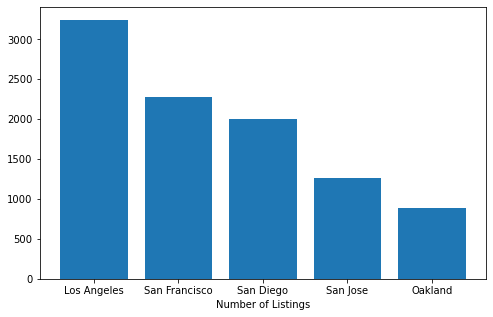

In [124]:
city_lst = []
cities, count = np.unique(data_1['city'].to_numpy(), return_counts = True)
for city, n in zip(cities, count):
    city_lst.append((city, n))
    
sorted_city = sorted(city_lst,key=lambda x: x[1], reverse=True)
top10_cities = [x[0] for x in sorted_city[:5]]
top10_n = [x[1] for x in sorted_city[:5]]

fig, ax = plt.subplots(figsize = (8,5))
ax.bar(top10_cities, top10_n)
ax.set_xlabel('Number of Listings')

In [82]:
data_1['rent'][data_1['rent'].str.contains('Call for Rent')]

43       Call for Rent
44       Call for Rent
57       Call for Rent
61       Call for Rent
63       Call for Rent
             ...      
20821    Call for Rent
20822    Call for Rent
20823    Call for Rent
20824    Call for Rent
20825    Call for Rent
Name: rent, Length: 5207, dtype: object

In [110]:
data_2 = data_1.drop(index = data_1[data_1['rent'].str.contains('Call for Rent')].index)

In [113]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15794 entries, 0 to 21000
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   15794 non-null  object
 1   property_name         15794 non-null  object
 2   city                  15794 non-null  object
 3   rent                  15794 non-null  object
 4   bed                   15794 non-null  object
 5   bath                  15794 non-null  object
 6   sq_ft                 15794 non-null  object
 7   walkscore             15794 non-null  object
 8   Unique Features       13157 non-null  object
 9   Pet Policy            14763 non-null  object
 10  Parking               13677 non-null  object
 11  Property Information  14798 non-null  object
 12  Lease Length          12852 non-null  object
 13  Services              13213 non-null  object
 14  Interior              12238 non-null  object
 15  Fitness & Recreation  13366 non-null

In [116]:
data_2['rent'][data_2['rent'].str.contains('Person')]
data_3 = data_2.drop(index = data_2[data_2['rent'].str.contains('Person')].index)

In [117]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15595 entries, 0 to 21000
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   15595 non-null  object
 1   property_name         15595 non-null  object
 2   city                  15595 non-null  object
 3   rent                  15595 non-null  object
 4   bed                   15595 non-null  object
 5   bath                  15595 non-null  object
 6   sq_ft                 15595 non-null  object
 7   walkscore             15595 non-null  object
 8   Unique Features       12986 non-null  object
 9   Pet Policy            14621 non-null  object
 10  Parking               13543 non-null  object
 11  Property Information  14599 non-null  object
 12  Lease Length          12686 non-null  object
 13  Services              13017 non-null  object
 14  Interior              12057 non-null  object
 15  Fitness & Recreation  13216 non-null

Text(0.5, 0, 'Number of Listings')

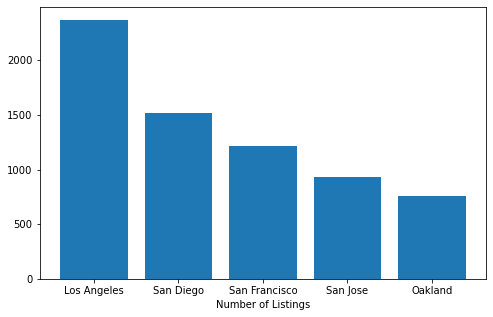

In [121]:
city_lst = []
cities, count = np.unique(data_3['city'].to_numpy(), return_counts = True)
for city, n in zip(cities, count):
    city_lst.append((city, n))
    
sorted_city = sorted(city_lst,key=lambda x: x[1], reverse=True)
top10_cities = [x[0] for x in sorted_city[:5]]
top10_n = [x[1] for x in sorted_city[:5]]

fig, ax = plt.subplots(figsize = (8,5))
ax.bar(top10_cities, top10_n)
ax.set_xlabel('Number of Listings')

In [125]:
# Manually get the top 5 average

header = {"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}
city_page_url = 'https://www.apartments.com/oakland-ca/'

r = requests.get(city_page_url, timeout = 30, headers = header)
if r.status_code == 200:
    page_soup = soup(r.content, 'html.parser')
    script = page_soup.find('script',type='application/ld+json')
        
    script_json = json.loads(str(script)[41:-11])

# script_json

In [122]:
sf_avg_rent = {'Studio': '$2,660', '1 Bedroom': '$2,626', '2 Bedroom': '$3,743', '3 Bedroom': '$3,948'}
la_avg_rent = {'Studio': '$1,183', '1 Bedroom': '$1,891', '2 Bedroom': '$2,427', '3 Bedroom': '$3,988'}
sd_avg_rent = {'Studio': '$1,585', '1 Bedroom': '$1,340', '2 Bedroom': '$1,707', '3 Bedroom': '$3,112'}
sj_avg_rent = {'Studio': '$1,889', '1 Bedroom': '$2,156', '2 Bedroom': '$2,885', '3 Bedroom': '$4,032'}
okl_avg_rent = {'Studio': '$1,408', '1 Bedroom': '$1,559', '2 Bedroom': '$1,835', '3 Bedroom': '$2,479'}

sf = pd.DataFrame([sf_avg_rent], index = ['San Francisco'])
la = pd.DataFrame([la_avg_rent], index = ['Los Angeles'])
sd = pd.DataFrame([sd_avg_rent], index = ['San Diego'])
sj = pd.DataFrame([sj_avg_rent], index = ['San Jose'])
oak = pd.DataFrame([okl_avg_rent], index = ['Oakland'])

top5_avg = pd.concat([la,sd,sf,sj,oak])

In [123]:
top5_avg

,Studio,1 Bedroom,2 Bedroom,3 Bedroom
Los Angeles,"$1,183","$1,891","$2,427","$3,988"
San Diego,"$1,585","$1,340","$1,707","$3,112"
San Francisco,"$2,660","$2,626","$3,743","$3,948"
San Jose,"$1,889","$2,156","$2,885","$4,032"
Oakland,"$1,408","$1,559","$1,835","$2,479"
